# **Regressão para análise de admissão universitária**

Neste projeto, tentaremos estimar a chande de um candidato à Universidade da Califórnia em Los Angeles (UCLA) ser aprovado com base em suas qualificações. <br>
O Dataset utilizado contém dados de pontuação de 500 canditatos, junto da chance de aprovação de cada um. Através de técnicas de regressão linear, tentaremos prever a chance de um aspirante conseguir uma vaga na UCLA. <br>
Iniciaremos importando bibliotecas, carregando o dataset e realizando análises iniciais.


In [422]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [423]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### **Análise de Correlação dos dados**

Nossa variável alvo será a "Chance of Admit", as restantes sendo utilizadas para prevê-la, com exceção da "Serial No.". Através da análise correlação, nota-se que todas as variáveis restantes possuem boa correlação com a variável alvo, sendo apropriada para a utilização de regressão linear.

In [165]:
df.corr(method='spearman')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.099592,-0.142607,-0.055424,-0.144249,0.004220,-0.075126,-0.005332,-0.001733
GRE Score,-0.099592,1.000000,0.823853,0.643423,0.620688,0.514352,0.829251,0.578487,0.822201
TOEFL Score,-0.142607,0.823853,1.000000,0.645533,0.644715,0.523434,0.809485,0.474540,0.793634
University Rating,-0.055424,0.643423,0.645533,1.000000,0.729399,0.602319,0.703333,0.435351,0.703742
SOP,-0.144249,0.620688,0.644715,0.729399,1.000000,0.662653,0.717384,0.409088,0.702799
LOR,0.004220,0.514352,0.523434,0.602319,0.662653,1.000000,0.639563,0.376166,0.643627
CGPA,-0.075126,0.829251,0.809485,0.703333,0.717384,0.639563,1.000000,0.509264,0.888786
Research,-0.005332,0.578487,0.474540,0.435351,0.409088,0.376166,0.509264,1.000000,0.565715
Chance of Admit,-0.001733,0.822201,0.793634,0.703742,0.702799,0.643627,0.888786,0.565715,1.000000


### **Pré-processamento dos dados**

Aqui será feita a separação dos dados em conjunto de treinamento e teste. Os conjuntos foram separados na proporção 70/30, sendo 70% dos dados para treinamento e 30% para teste. Os dados também foram normalizados para que tenham média igual a zero e desvio padrão unitário.

In [424]:
X = df.drop(columns=['Serial No.', 'Chance of Admit '])
y = df['Chance of Admit ']

In [504]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### **Treinamento e avaliação dos modelos**

Para esta tarefa, dois algoritmos foram empregados: Linear Regression e Random Forest Regression. A implementação de cada um pode ser observada abaixo.

In [524]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)

y_pred_test_reg = reg.predict(X_test)
y_pred_train_reg = reg.predict(X_train)

R2_test_reg = r2_score(y_test, y_pred_test_reg)
R2_train_reg = r2_score(y_train, y_pred_train_reg)

RMSE_test_reg = mean_squared_error(y_test, y_pred_test_reg, squared=False)
RMSE_train_reg = mean_squared_error(y_train, y_pred_train_reg, squared=False)

print('R² Test:', round(R2_test_reg,2))
print('RMSE Test:', round(RMSE_test_reg,2))

print('R² Train:', round(R2_train_reg,2))
print('RMSE Train:', round(RMSE_train_reg,2))

R² Test: 0.84
RMSE Test: 0.06
R² Train: 0.81
RMSE Train: 0.06


In [525]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

reg = RandomForestRegressor(max_depth=4, criterion='mse').fit(X_train, y_train)

y_pred_test = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

R2_test = r2_score(y_test, y_pred_test)
R2_train = r2_score(y_train, y_pred_train)

RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)

print('R² Test:', round(R2_test,2))
print('RMSE Test:', round(RMSE_test,2))

print('R² Train:', round(R2_train,2))
print('RMSE Train:', round(RMSE_train,2))

R² Test: 0.83
RMSE Test: 0.06
R² Train: 0.85
RMSE Train: 0.05


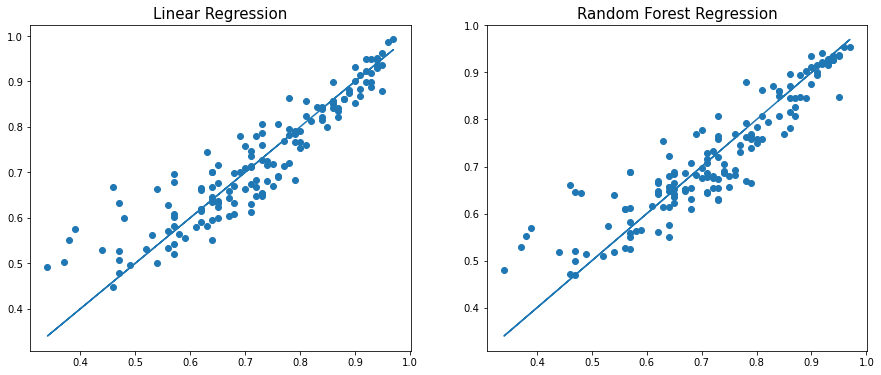

In [526]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
axs[0].scatter(y_test, y_pred_test_reg)
axs[0].plot(y_test, y_test,)
axs[0].set_title('Linear Regression', fontdict={'fontsize':15})
axs[1].scatter(y_test, y_pred_test)
axs[1].plot(y_test, y_test)
axs[1].set_title('Random Forest Regression', fontdict={'fontsize':15}) 
plt.show()

Como pode-se observar, ambos os algoritmos empregados obtiveram resultados muito próximos para prever a chance de um candidato ser aprovado na UCLA. Os dados previstos aproximam-se da reta que nos daria o resultado ideal, logo alcançou-se um grau considerável de certeza de previsão com os modelos utilizados. <br>
Algo a se observar é a assertividade dos modelos aumentando conforme o valor da chance aumenta, notável pela maior proximidade com a reta de resultado ideial para valores acima de 0.8. Esse resultado pode dar-se pelo fato de o conjunto de dados possuir mais candidatos com chances altas do que baixas, podendo ser observado a partir da análise feita inicialmente sobre o conjunto de dados, onde a média das chances foi 0.72.<br>
Uma forma de superar o problema seria obter um conjunto de dados com mais candidatos e mais diversificados, com uma distruibuição do valor de chances mais uniforme.

O dataset utilizado foi disponibilizado pelos pesquisadores que aparecem em: <br>
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019